In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="5" color="red">ch10. N차원 배열다루기</font></b>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배역 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c언어로 구현되어 거성은 수치 계산 패키지
# 1절. 넘파이 패키지

In [6]:
import numpy as np
np.__version__

'1.23.5'

In [5]:
# np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [21]:
from numpy import arange
a= arange(15).reshape(3, 5) # 3행 5열 짜리 2차원 배열로 retrun
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
type(a) # a변수의 타입

numpy.ndarray

In [9]:
a.dtype # a 배열 요소의 tyep

dtype('int32')

In [11]:
a.dtype.name

'int32'

In [12]:
a.itemsize # 한 요소의 bytesize

4

In [13]:
a.ndim # 차원수(축수)

2

In [14]:
a.size # 배열 요소의 갯수

15

In [15]:
a.shape # 배열의 구조(튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [22]:
# 구조 변겨
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [30]:
# 타입 변경 (X)
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
a.dtype

dtype('int32')

In [32]:
a[0, 3]

3

In [27]:
a.itemsize

4

In [33]:
a.size, a.shape # 12개 요소 3행 4열

(12, (3, 4))

In [34]:
a.dtype = np.int64 # a배열을 읽을 때 64bit 씩 읽는다
a.dtype

dtype('int64')

In [35]:
a.itemsize

8

In [36]:
a.size, a.shape

(6, (3, 2))

In [37]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [38]:
# 타입 변경 (O)
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
# 64bit로 변경하는 법
a = a.astype(np.int64) # = a.astype('int64') 같음
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [42]:
a.dtype

dtype('int64')

In [43]:
a.itemsize

8

In [46]:
a.size, a.shape

(12, (3, 4))

In [47]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [52]:
a.flatten() # 1차원으로 변경

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [49]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [53]:
b = a.flatten() # 변경된걸 적용하고 싶으면 할당해야 함
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

##  1.3 배열 저장

In [54]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [55]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [56]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [58]:
np.all(a == load_a) # a 넘파이 배열과 load_a 넘파이 배열이 같은지 확인

True

In [59]:
np.save('data/ch10_a.npy', a) # 용량이 큰 넘파일 

In [60]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2 == a)

True

# 2절. 넘파이 배열
- array()함수를 이용한 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들...
## 2.1 array()함수로 넘파이 배열 만들기
array(리스트, 튜플, dtype=np.xxx(생략가능), copy=T/F)

In [65]:
a = np.array([2, 4, 6], dtype=np.int8) # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [68]:
a[0], a[1],a[2]

(2, 4, 6)

In [69]:
a.dtype

dtype('int8')

In [76]:
b = np.array([[1.2,3.4],[4,5]], dtype=np.float32).reshape(1, 4)
b

array([[1.2, 3.4, 4. , 5. ]], dtype=float32)

In [77]:
b.dtype

dtype('float32')

In [78]:
b.astype(np.float64)

array([[1.20000005, 3.4000001 , 4.        , 5.        ]])

In [80]:
l = [[1, 2],[3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [81]:
c = np.array([[1, 2],[3.4,4.5]], dtype = np.float16)
c

array([[1. , 2. ],
       [3.4, 4.5]], dtype=float16)

In [83]:
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print('{}행{}열:{}'.format(i, j, item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [85]:
c = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [87]:
c[0, 3]

4

In [89]:
c[:, 1:3] # 모든행 1열 부터 3열 앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [91]:
# 0행  2열 부터 4열 까지
c[0, 2:]

array([3, 4, 5], dtype=int16)

In [92]:
# 모든 행의 맨 마지막 열만 추출
c[:, -1]

array([ 5, 10], dtype=int16)

In [93]:
# 모든 행의 맨 마지막 열을 제외한 추출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [99]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=False) # False : 복사를 하지 않고 기존 주소 사용 d = c (얋은 복사)
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소={}'. format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소 =2356445644528, d주소=2356445644528


In [100]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True) # True : 복사를 하여 새로운 주소 출력 d = c 깊은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소 ={}, d주소={}'. format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소 =2356445644432, d주소=2356444954128


## 2.2 기본값이 있는 배열 만들기
- np.zeros (tup) : 요소들이 다 0으로 출력
- np. ones (tup) : 요소들이 다 1로 출력
- np.full( tup, 기본 값) ): 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성 따라 지정 가능

In [103]:
np.zeros( (3, 5) , dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [106]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [107]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [109]:
np.empty( (2, 5) )

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random,random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값(확인시 횟수를 들리면 된다)
- np.random.unifrom(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 램덤 값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균 loc과 표준편차 scale을 갖는 정규분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편자1인 정규분포)의 1차원 난수 배열 발생(난수 n개)

cf.  np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

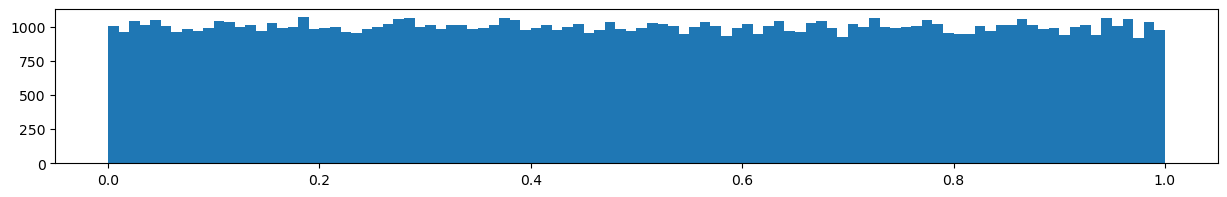

In [118]:
import matplotlib.pyplot as plt
x = np.random.rand(100000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins=100)
plt. show()       

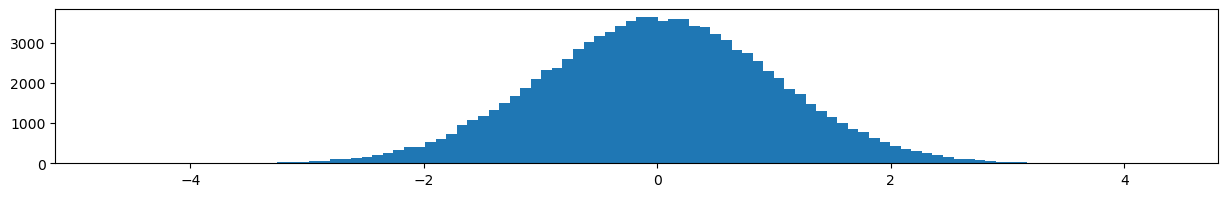

In [120]:
x = np.random.randn(100000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize = (가로, 세로)
plt.hist(x, bins=100)
plt. show() 

In [143]:
# 2 차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random( (2, 5) ) #0부터 1미만의 균등분포를 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [144]:
np.random.uniform(-1, 10, (2, 5)) # -1부터 10 미만으 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [145]:
np.random.normal(10, 2, (2, 5)) # 편균 10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지 (to포함) count개 숫자를 1차원 배열

In [146]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [147]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

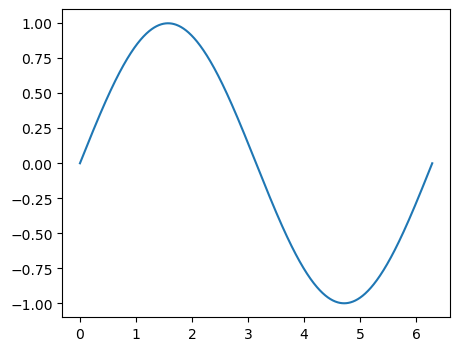

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.plot(x, y)
plt.show()

In [154]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [155]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수도 
- resize([면수], 행수, 열수 : -1 불가
- T : 전치행열로 변환
- transpose() : 전치행열로 변환
※ 실행경과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [163]:
a = np.random.random( (2, 3))
a

array([[0.4655081 , 0.03516826, 0.08427267],
       [0.7325207 , 0.63619999, 0.02790779]])

In [164]:
a * 10

array([[4.655081  , 0.35168261, 0.8427267 ],
       [7.32520698, 6.36199994, 0.27907789]])

In [165]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[5., 0., 1.],
       [7., 6., 0.]])

In [168]:
a = a.reshape(3, 2)
a

array([[5., 0.],
       [1., 7.],
       [6., 0.]])

In [171]:
a.reshape(1, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[5., 0., 1., 7., 6., 0.]])

In [173]:
a = a.reshape(-1, 1)
a

array([[5.],
       [0.],
       [1.],
       [7.],
       [6.],
       [0.]])

In [174]:
a.resize( (2, 3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 -1불가

In [175]:
a

array([[5., 0., 1.],
       [7., 6., 0.]])